<a href="https://colab.research.google.com/github/souradipta93/Predictive_Analytics/blob/main/MBA_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cluster Analysis-  K-Means  clustering
#Example Problem Adopted from Winston

In [ ]:
#Import Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Read Data File
mydata=pd.read_csv("MBA-Data.csv")
mydata   

,School,GPA,GMAT,Acceptance,Salary,Fee
0,Harvard University,3.66,724,11.1,139735,60610
1,Standford University,3.70,730,7.0,140972,55200
2,University of Pennsylvania,3.56,718,18.8,137311,58244
3,Massachusetts Institute of Technology,3.51,710,13.3,132618,52900
4,Northwestern University,3.54,712,21.1,130092,54225
5,University of Chicago,3.52,719,21.9,133424,54252
6,University of California-Berkeley,3.64,715,12.2,129776,53396
7,Columbia University,3.50,716,15.9,134233,58350
8,Dartmouth College,3.52,718,17.9,138220,56555
9,Yale University,3.52,719,19.1,125735,53900


In [ ]:
#Standardizing Variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=mydata.iloc[:,1:6]
scaled_mydata=scaler.fit_transform(X)


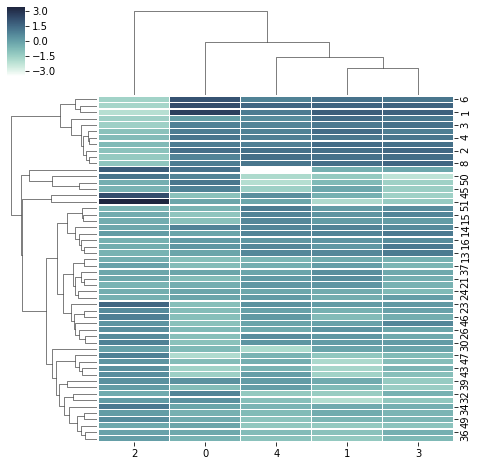

In [ ]:
#Dendrogram(Tree Diagram)
cmap=sns.cubehelix_palette(as_cmap=True,rot=-.3,light=1)
sns.clustermap(scaled_mydata,cmap=cmap,linewidths=.2,
              figsize=(8,8));

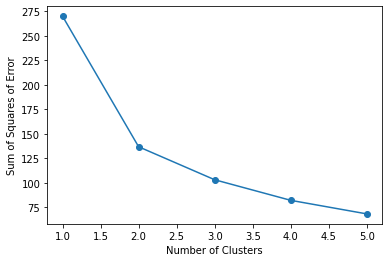

In [ ]:
#Optimum Cluster
from sklearn.cluster import KMeans
cluster_range=range(1,6)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_mydata)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(6,4))        
plt.ylabel("Sum of Squares of Error")
plt.xlabel("Number of Clusters")
plt.plot(cluster_range,cluster_errors,marker="o");
    

In [ ]:
#Building the KMeans Cluster
k=3
clusters=KMeans(k,random_state=42)
clusters.fit(scaled_mydata)
mydata["clusterid"]=clusters.labels_
mydata
 

,School,GPA,GMAT,Acceptance,Salary,Fee,clusterid
0,Harvard University,3.66,724,11.1,139735,60610,1
1,Standford University,3.70,730,7.0,140972,55200,1
2,University of Pennsylvania,3.56,718,18.8,137311,58244,1
3,Massachusetts Institute of Technology,3.51,710,13.3,132618,52900,1
4,Northwestern University,3.54,712,21.1,130092,54225,1
5,University of Chicago,3.52,719,21.9,133424,54252,1
6,University of California-Berkeley,3.64,715,12.2,129776,53396,1
7,Columbia University,3.50,716,15.9,134233,58350,1
8,Dartmouth College,3.52,718,17.9,138220,56555,1
9,Yale University,3.52,719,19.1,125735,53900,1


In [ ]:
mydata[mydata.clusterid==0]

,School,GPA,GMAT,Acceptance,Salary,Fee,clusterid
27,University of Wisconsin-Madison,3.33,680,30.3,105333,26757,0
29,Arizona State University,3.36,674,32.2,95255,37345,0
32,Texas A&M University-College Station,3.50,647,27.4,97279,32927,0
33,Brigham Young University,3.55,670,52.4,103369,10600,0
34,University of Washington,3.40,675,43.5,97970,39219,0
36,Boston College,3.39,656,30.7,98283,37110,0
38,University of Illinois-Urbana-Champaign,3.40,650,28.1,85916,33457,0
39,University of Rochester,3.46,675,36.1,81117,46887,0
40,University of Texas-Dallas,3.54,662,25.8,76272,25447,0
41,Purdue University,3.32,635,34.9,89720,41271,0


In [ ]:
mydata[mydata.clusterid==1]

,School,GPA,GMAT,Acceptance,Salary,Fee,clusterid
0,Harvard University,3.66,724,11.1,139735,60610,1
1,Standford University,3.70,730,7.0,140972,55200,1
2,University of Pennsylvania,3.56,718,18.8,137311,58244,1
3,Massachusetts Institute of Technology,3.51,710,13.3,132618,52900,1
4,Northwestern University,3.54,712,21.1,130092,54225,1
5,University of Chicago,3.52,719,21.9,133424,54252,1
6,University of California-Berkeley,3.64,715,12.2,129776,53396,1
7,Columbia University,3.50,716,15.9,134233,58350,1
8,Dartmouth College,3.52,718,17.9,138220,56555,1
9,Yale University,3.52,719,19.1,125735,53900,1


In [ ]:
mydata[mydata.clusterid==2]

,School,GPA,GMAT,Acceptance,Salary,Fee,clusterid
11,Duke University,3.44,689,26.5,128666,52152,2
12,University of Michigan-Ann Arbor,3.40,703,32.2,127817,52944,2
13,University of Virginia,3.40,701,24.6,127595,52000,2
15,Cornell University,3.29,691,27.1,122329,53200,2
16,University of Texas-Austin,3.43,692,25.3,118410,47836,2
17,Carnegie Mellon University,3.35,686,23.9,117650,54800,2
18,Emory University,3.30,681,35.1,121050,44098,2
19,U. of North Carolina-Chapel Hill,3.31,689,37.7,101904,50613,2
20,University of Southern California,3.30,687,27.0,109619,51784,2
21,Washington University in St. Louis,3.32,696,28.1,99354,46975,2


In [ ]:
#Profiling the Clusters
Table=pd.pivot_table(mydata,values=["GPA","GMAT","Acceptance","Salary","Fee"],index=["clusterid"])
Table

,Acceptance,Fee,GMAT,GPA,Salary
clusterid,,,,,
0,37.371429,36123.095238,656.857143,3.388571,88291.380952
1,16.708333,55066.166667,717.000000,3.549167,132509.416667
2,31.209524,47697.238095,685.714286,3.348095,109440.428571


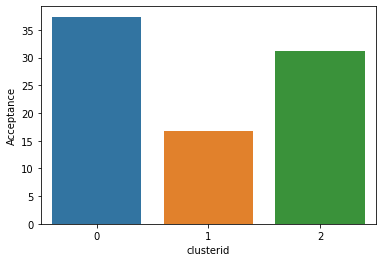

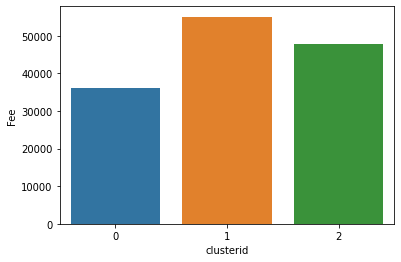

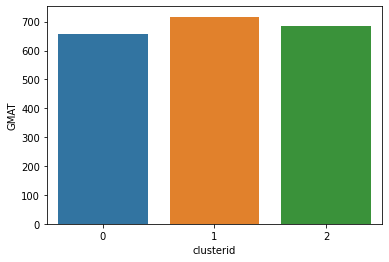

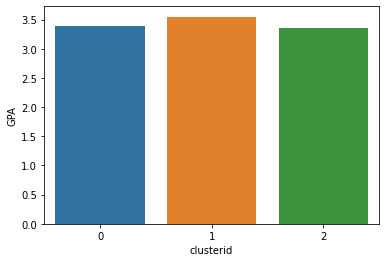

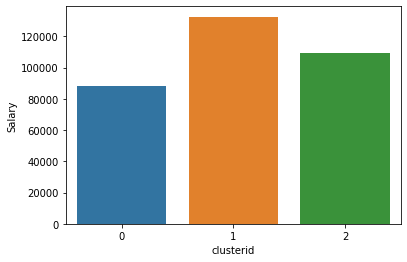

In [ ]:
sns.barplot(x=Table.index,y=Table.Acceptance)
plt.show()
sns.barplot(x=Table.index,y=Table.Fee)
plt.show()
sns.barplot(x=Table.index,y=Table.GMAT)
plt.show()
sns.barplot(x=Table.index,y=Table.GPA)
plt.show() 
sns.barplot(x=Table.index,y=Table.Salary)
plt.show()